In [1]:
# !pip install Cython

In [2]:
# !pip install pymorphy2

In [3]:
!pip install "tqdm>=4.9.0"

In [4]:
# !pip install fasttext==0.6.0

In [5]:
# !git clone https://github.com/facebookresearch/fastText.git
# !cd fastText
# !pip install fastText

In [6]:
import os

import numpy as np
import pandas as pd

In [7]:
import fasttext
import fasttext.util

In [8]:
help(fasttext.util.download_model)

Help on function download_model in module fasttext.util.util:

download_model(lang_id, if_exists='strict', dimension=None)
    Download pre-trained common-crawl vectors from fastText's website
    https://fasttext.cc/docs/en/crawl-vectors.html



In [9]:
# fasttext.util.download_model('ru', if_exists='ignore')
ft = fasttext.load_model('cc.ru.300.bin')

In [10]:
ft['привет']

array([ 0.06434693, -0.01527086, -0.06963537, -0.03582602,  0.01471584,
       -0.03503159,  0.02701715,  0.04161827, -0.00033126,  0.00355259,
        0.06979205,  0.06205348,  0.05154078,  0.03831509, -0.02394784,
       -0.03954181, -0.00189653, -0.11174394, -0.0407712 ,  0.09289949,
       -0.07412342, -0.05209147,  0.02017231,  0.04837443,  0.02212641,
        0.00856511, -0.03055364,  0.04733564,  0.04380886,  0.03856769,
        0.03442968,  0.05576854,  0.01513439,  0.14055566,  0.03365337,
       -0.02920472, -0.10305687, -0.09332671,  0.03085899, -0.11067575,
       -0.08992791,  0.05850704, -0.017424  ,  0.00120653, -0.07153153,
        0.10312843, -0.08066262, -0.00642456,  0.04408539, -0.05728461,
       -0.0179531 ,  0.03936698,  0.04778077, -0.04907751, -0.00909553,
        0.05588715, -0.00236535,  0.04878682, -0.01769035,  0.03295048,
        0.00906604,  0.08772802,  0.02970458, -0.04903899, -0.03025401,
       -0.04151824,  0.04931813, -0.02804473,  0.05716789,  0.03

In [11]:
from gensim.models import word2vec

def get_tweet_embedding(lemmas, model, embedding_size=300):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [12]:
x = 'привет всем слушателям курса'
get_tweet_embedding(x, model=ft, embedding_size=300)

array([ 2.84749218e-02,  1.14055865e-02, -1.54750008e-02,  6.10717852e-03,
       -5.42343501e-03,  2.83443742e-03,  2.40256451e-03,  1.29073053e-02,
        3.05031866e-02, -1.99234379e-02,  6.13203850e-02,  4.42768331e-02,
        2.71531800e-02, -1.02064133e-02,  9.22483567e-04,  2.50384058e-02,
       -1.25383004e-02, -4.89095808e-02, -3.07890818e-02,  1.01918663e-01,
       -2.85800546e-02, -1.05811988e-01, -1.28629373e-02,  2.95597422e-02,
        2.13206490e-03,  1.26906892e-02, -2.97227059e-02,  2.77029723e-02,
       -1.21254625e-02, -4.76178443e-02, -6.68591424e-03,  3.05985650e-02,
        3.59081652e-02,  1.02970391e-01,  3.62780495e-02, -5.56655712e-02,
       -1.11200343e-01, -1.16946280e-01,  4.69890856e-02, -5.79430675e-02,
       -4.56299540e-03, -2.32621958e-03, -2.30524363e-03,  1.96370891e-02,
       -1.68996924e-02,  4.77626729e-02, -7.71877861e-02,  2.95996453e-02,
        3.40769021e-02, -3.43663241e-02,  5.55797149e-02,  1.05126291e-02,
        9.77615127e-03,  

In [13]:
BACKTEST_CCY = 'USDRUB'
BACKTEST_DAYS = 5
YEAR = 2022

PATH_TEXTS = 'data/telegram'
PATH_OPT_PNL = 'data/pnl'

In [14]:
# Get all available data_sources
sources = os.listdir(PATH_TEXTS)
sources

['cbonds.csv',
 'themovchans.csv',
 'headlines_QUANTS.csv',
 'War_Wealth_Wisdom.csv',
 'mmi.csv',
 'vts.csv',
 'signal.csv',
 '.gitignore',
 'rshb_invest.csv',
 'Alfa_Wealth.csv',
 'sky_bond.csv',
 'bitkogan.csv']

In [15]:
# Create target variable dataframe
pnl = pd.read_csv(f'{PATH_OPT_PNL}/Backtest_{BACKTEST_CCY}_{BACKTEST_DAYS}_days_{YEAR}.txt')
pnl['date_start'] = pd.to_datetime(pnl['date_start']).dt.strftime('%Y-%m-%d')
pnl['pnl_sign'] = pnl['pnl'].apply(lambda x: 1 if x >= 0 else 0)
pnl

,date_start,pnl,pnl_sign
0,2022-03-02,4.562674e+06,1
1,2022-03-03,-4.663725e+06,0
2,2022-03-04,-4.845276e+05,0
3,2022-03-09,1.268498e+06,1
4,2022-03-10,-2.874466e+06,0
...,...,...,...
138,2022-09-28,-3.886725e+05,0
139,2022-09-29,8.040320e+05,1
140,2022-09-30,1.544311e+06,1
141,2022-10-03,1.868107e+06,1


In [16]:
# Get balance of the sample
balance = pnl['pnl_sign'].sum() / pnl.shape[0]
max([balance, 1 - balance])

0.32167832167832167

In [17]:
import datetime as dt
from typing import List, Tuple, Union


def _binary_search_by_date(array: List[Tuple[dt.datetime, float]], date_x: dt.datetime) -> Union[int, None]:
    """
    Searches for the index of date_x in the array via binary search.

        Parameters:
            array (list) : A sorted array of (date, float_value) tuples
            date_x (datetime.datetime) : Date to search for

        Returns:
            index_x (int): Index of the searched date in the array.
    """
    left = 0
    right = len(array) - 1

    while left <= right:
        mid = left + (right - left) // 2

        if array[mid - 1][0] <= date_x <= array[mid][0]:
            return mid
        elif date_x > array[mid - 1][0] and date_x > array[mid][0]:
            left = mid + 1
        else:
            right = mid - 1

    return None


def binary_search_time_series(time_series: List[Tuple[dt.datetime, float]], date_start: dt.datetime,
                              date_end: dt.datetime) -> Union[List[Tuple[dt.datetime, float]], None]:
    """
    Searches for the part of the time series that is contained inside [date_start; date_end] period via binary search.

        Parameters:
            time_series (list) : A sorted array of (date, float_value) tuples
            date_start (datetime.datetime) : Starting date of the searched period
            date_end (datetime.datetime) : Ending date of the searched period

        Returns:
            time_series_data (list): Part of the time series that is contained inside [date_start; date_end] period.
    """

    if date_start <= date_end:
        left_index = _binary_search_by_date(time_series, date_start)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_end)
        
        if right_index is None:
            return None
        
        right_index += left_index
    else:
        left_index = _binary_search_by_date(time_series, date_end)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_start)
        
        if right_index is None:
            return None
        
        right_index += left_index
    
    return time_series[left_index:right_index]

In [18]:
pnl_sign_ts = [(pd.to_datetime(row['date_start']).to_pydatetime(), row['pnl_sign']) for  _, row in pnl.iterrows()]
pnl_sign_ts

[(datetime.datetime(2022, 3, 2, 0, 0), 1),
 (datetime.datetime(2022, 3, 3, 0, 0), 0),
 (datetime.datetime(2022, 3, 4, 0, 0), 0),
 (datetime.datetime(2022, 3, 9, 0, 0), 1),
 (datetime.datetime(2022, 3, 10, 0, 0), 0),
 (datetime.datetime(2022, 3, 11, 0, 0), 0),
 (datetime.datetime(2022, 3, 14, 0, 0), 0),
 (datetime.datetime(2022, 3, 15, 0, 0), 0),
 (datetime.datetime(2022, 3, 16, 0, 0), 0),
 (datetime.datetime(2022, 3, 17, 0, 0), 0),
 (datetime.datetime(2022, 3, 18, 0, 0), 1),
 (datetime.datetime(2022, 3, 21, 0, 0), 0),
 (datetime.datetime(2022, 3, 22, 0, 0), 0),
 (datetime.datetime(2022, 3, 23, 0, 0), 0),
 (datetime.datetime(2022, 3, 24, 0, 0), 0),
 (datetime.datetime(2022, 3, 25, 0, 0), 0),
 (datetime.datetime(2022, 3, 28, 0, 0), 0),
 (datetime.datetime(2022, 3, 29, 0, 0), 0),
 (datetime.datetime(2022, 3, 30, 0, 0), 0),
 (datetime.datetime(2022, 3, 31, 0, 0), 0),
 (datetime.datetime(2022, 4, 1, 0, 0), 1),
 (datetime.datetime(2022, 4, 4, 0, 0), 0),
 (datetime.datetime(2022, 4, 5, 0, 0),

In [19]:
# Generate dataframes
df = pd.DataFrame()

for s in sources:
    if s != '.gitignore':
        source_data = pd.read_csv(f'{PATH_TEXTS}/{s}')
        df = df.append(source_data)

df.head()

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_26199/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_26199/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_26199/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_26199/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j5

,id,date,text
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...


In [20]:
# initial_date = pnl_sign_ts[0][0]

# for i, row in df.iterrows():
#     date_x = pd.to_datetime(row['date']).to_pydatetime()
#     pnl_sign_key = _binary_search_by_date(pnl_sign_ts, date_x)
    
#     if pnl_sign_key is not None and date_x >= initial_date:
#         df.loc[df.index[i], 'pnl_sign'] = pnl_sign_ts[_binary_search_by_date(pnl_sign_ts, date_x)][1]

In [21]:
initial_date = pnl_sign_ts[0][0]

def get_pnl_sign(row):
    date_x = pd.to_datetime(row['date']).to_pydatetime()
    pnl_sign_key = _binary_search_by_date(pnl_sign_ts, date_x)
    
    if pnl_sign_key is not None and date_x >= initial_date:
        return pnl_sign_ts[_binary_search_by_date(pnl_sign_ts, date_x)][1]

In [22]:
df['pnl_sign'] = df.apply(lambda row: get_pnl_sign(row), axis=1)
df.head()

,id,date,text,pnl_sign
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...,NaN
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...,NaN
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...,NaN
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...,NaN
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...,NaN


In [23]:
df.dropna(subset=['pnl_sign'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,id,date,text,pnl_sign
0,10813,2022-03-02T09:38:25,УТРЕННИЙ ДАЙДЖЕСТ 🏛❗️Банк России принял решен...,0.0
1,10814,2022-03-02T10:49:57,#НовостиКомпаний ⚡️ Российские компании: осно...,0.0
2,10815,2022-03-02T11:06:47,⚡️ Важное на рынках: ⛔️Международная ассоциаци...,0.0
3,10816,2022-03-02T11:23:57,📝 НАУФОР просит рассмотреть вопрос дополнитель...,0.0
4,10817,2022-03-02T12:23:55,#ДенежныйРынок 📆 💰События денежного рынка сего...,0.0


In [24]:
X = df.drop(['id', 'date', 'pnl_sign'], axis=1)
y = df['pnl_sign']

In [25]:
X['text']

0        УТРЕННИЙ ДАЙДЖЕСТ  🏛❗️Банк России принял решен...
1        #НовостиКомпаний  ⚡️ Российские компании: осно...
2        ⚡️ Важное на рынках: ⛔️Международная ассоциаци...
3        📝 НАУФОР просит рассмотреть вопрос дополнитель...
4        #ДенежныйРынок 📆 💰События денежного рынка сего...
                               ...                        
14922    Завершаем начатую в субботу серию  заметок  о ...
14923    Санкции на НКЦ = санкции на американские акции...
14924    В среду в Вене группа ОПЕК+ встретится, чтобы ...
14925    На прошлой неделе в  сервисе по подписке  мы з...
14926    Торги на валютном рынке сегодня проходят нетип...
Name: text, Length: 14927, dtype: object

In [26]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

from functools import lru_cache
from tqdm.notebook import tqdm
from tqdm.gui import tqdm as tqdm_gui

m = MorphAnalyzer()
regex = re.compile("[а-яa-zёЁ]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return ' '.join(remove_stopwords(lemmas))

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=121)

In [28]:
lemmas = list(tqdm(map(clean_text, X_train['text']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(5)

  0%|          | 0/11941 [00:00<?, ?it/s]

,text,lemmas
9288,#Макро \n 📊 Опрос: Маск — красавчик? В апреле ...,макро опрос маск красавчик апрель опросить отз...
10636,#Макро \n🇷🇺 Санкции против России не смогли по...,макро санкция против россия смочь подорвать фи...
4785,#Commodities \n📊 Товарные биржи Цены фьючер...,commodities товарный биржа цена фьючерс основн...
8707,#Commodities \n📊 Товарные биржи Цены фьючер...,commodities товарный биржа цена фьючерс основн...
2392,‼️ Все карты международных платежных систем Vi...,карта международный платёжный система visa mas...


In [29]:
lemmas_val = list(tqdm(map(clean_text, X_val['text']), total=len(X_val)))

X_val['lemmas'] = lemmas_val

  0%|          | 0/2986 [00:00<?, ?it/s]

In [30]:
X_train.shape

(11941, 2)

In [31]:
tqdm.pandas()
X_train['embedding'] = X_train['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))
print('train done')

  0%|          | 0/11941 [00:00<?, ?it/s]

train done


In [35]:
tqdm.pandas()
X_val['embedding'] = X_val['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))

  0%|          | 0/2986 [00:00<?, ?it/s]

In [36]:
train_embedding = np.array(list(X_train['embedding'].values))
val_embedding = np.array(list(X_val['embedding'].values))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=12)
clf.fit(train_embedding, y_train)
clf.score(train_embedding, y_train)

0.6993551628841805

In [38]:
pred = clf.predict(val_embedding)
accuracy_score(pred, y_val)

0.6999330207635633

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=4, n_estimators=50)

rf.fit(train_embedding, y_train)
(y_val == rf.predict(val_embedding)).mean()

0.695244474212994

In [40]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_embedding, label=y_val)
model.fit(train_embedding, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [41]:
pred = model.predict(val_embedding)
accuracy_score(pred, y_val)

0.6999330207635633

In [42]:
lemmas = list(tqdm(map(clean_text, df['text']), total=len(df)))

df['lemmas'] = lemmas

  0%|          | 0/14927 [00:00<?, ?it/s]

In [43]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=12)

In [44]:
with open('train_ft.txt', 'w') as f:
    for label, lemmas in list(zip(
        y_train, X_train['lemmas']
    )):
        f.write(f"__label__{int(label)} {lemmas}\n")
        #print(f"__label__{int(label)} {lemmas}")

In [45]:
!tail train_ft.txt

__label__0 покупать коррекция эпизод энергетика энергетика традиционно считаться защитный актив поэтому сектор также обратить внимание многие энергетический компания продолжать платить дивиденд интер русгидро иметь достаточно стабильный бизнес негатив сектор сталкиваться санкционный проблема часть запрет поставка западный оборудование затруднять технический модернизация сказываться перспектива рост бизнес сектор отдельный история который обратить внимание частность интер почему самый ликвидный компания сектор интер напоминать сургутнефтегаз достаточно большой запас ожидание дать средство использовать покупка актив компания заявить уход россия enel forum uniper занизить цена крупный buyback иметься риск средство мочь потребоваться выкуп акция делистинг компания решить уйти биржа интер наиболее дешёвый мультипликатор компания российский рынок компания продолжать платить дивиденд последний выплата выплатить июнь размер акция итог соответствовать доходность минус отметить интер свести мини

In [46]:
classifier = fasttext.train_supervised('train_ft.txt')

Read 0M words
Number of words:  26644
Number of labels: 2
Progress: 100.0% words/sec/thread: 2629014 lr:  0.000000 avg.loss:  0.585039 ETA:   0h 0m 0s


In [47]:
pred = classifier.predict(list(X_val['lemmas']))[0]
pred = [int(label[0][-1]) for label in pred]

accuracy_score(list(y_val), pred)

0.6892163429336906

In [48]:
tokenized_tweets = [tweet.split() for tweet in train['lemmas'].values]

%time w2v = word2vec.Word2Vec(tokenized_tweets, workers=4, vector_size=200, min_count=10, window=3, sample=1e-3)

CPU times: user 5.41 s, sys: 108 ms, total: 5.51 s
Wall time: 1.65 s


In [49]:
w2v.wv.most_similar(positive=['рост'], topn=10)

[('снижение', 0.8544461727142334),
 ('падение', 0.825333297252655),
 ('замедление', 0.7423386573791504),
 ('скачок', 0.7407942414283752),
 ('динамика', 0.7228158116340637),
 ('восстановление', 0.7145742774009705),
 ('прирост', 0.7144163250923157),
 ('ускорение', 0.6959972977638245),
 ('сокращение', 0.6948442459106445),
 ('спад', 0.6923654675483704)]

In [50]:
def get_tweet_embedding(lemmas, model=w2v.wv, embedding_size=200):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [51]:
X_train['w2v_embedding'] = X_train['lemmas'].map(get_tweet_embedding)
X_val['w2v_embedding'] = X_val['lemmas'].map(get_tweet_embedding)

In [52]:
train_w2v = list(X_train['w2v_embedding'].values)
val_w2v = list(X_val['w2v_embedding'].values)

In [53]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_w2v, y_train)

pred = clf.predict(val_w2v)
accuracy_score(pred, y_val)

0.7016075016744809

In [54]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_w2v, label=y_val)
model.fit(train_w2v, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
pred = model.predict(val_w2v)
accuracy_score(pred, y_val)

0.702277294038848

In [56]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import collections

import torch
from torch import nn
from torch.nn import functional as F

import sys
import os
from tqdm import tqdm  
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim import utils
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
import gensim.downloader as api

# import dlnlputils
# from dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary, \
#     vectorize_texts, SparseFeaturesDataset
# from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed

# init_random_seed()

In [57]:
import collections
import re

import numpy as np

TOKEN_RE = re.compile(r'[\w\d]+')


def tokenize_text_simple_regex(txt, min_token_size=4):
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]


def character_tokenize(txt):
    return list(txt)


def tokenize_corpus(texts, tokenizer=tokenize_text_simple_regex, **tokenizer_kwargs):
    return [tokenizer(text, **tokenizer_kwargs) for text in texts]


def add_fake_token(word2id, token=''):
    word2id_new = {token: i + 1 for token, i in word2id.items()}
    word2id_new[token] = 0
    return word2id_new


def texts_to_token_ids(tokenized_texts, word2id):
    return [[word2id[token] for token in text if token in word2id]
            for text in tokenized_texts]


def build_vocabulary(tokenized_texts, max_size=1000000, max_doc_freq=0.8, min_count=5, pad_word=None):
    word_counts = collections.defaultdict(int)
    doc_n = 0

    # посчитать количество документов, в которых употребляется каждое слово
    # а также общее количество документов
    for txt in tokenized_texts:
        doc_n += 1
        unique_text_tokens = set(txt)
        for token in unique_text_tokens:
            word_counts[token] += 1

    # убрать слишком редкие и слишком частые слова
    word_counts = {word: cnt for word, cnt in word_counts.items()
                   if cnt >= min_count and cnt / doc_n <= max_doc_freq}

    # отсортировать слова по убыванию частоты
    sorted_word_counts = sorted(word_counts.items(),
                                reverse=True,
                                key=lambda pair: pair[1])

    # добавим несуществующее слово с индексом 0 для удобства пакетной обработки
    if pad_word is not None:
        sorted_word_counts = [(pad_word, 0)] + sorted_word_counts

    # если у нас по прежнему слишком много слов, оставить только max_size самых частотных
    if len(word_counts) > max_size:
        sorted_word_counts = sorted_word_counts[:max_size]

    # нумеруем слова
    word2id = {word: i for i, (word, _) in enumerate(sorted_word_counts)}

    # нормируем частоты слов
    word2freq = np.array([cnt / doc_n for _, cnt in sorted_word_counts], dtype='float32')

    return word2id, word2freq


PAD_TOKEN = '__PAD__'
NUMERIC_TOKEN = '__NUMBER__'
NUMERIC_RE = re.compile(r'^([0-9.,e+\-]+|[mcxvi]+)$', re.I)


def replace_number_nokens(tokenized_texts):
    return [[token if not NUMERIC_RE.match(token) else NUMERIC_TOKEN for token in text]
            for text in tokenized_texts]

In [58]:
import numpy as np
import scipy.sparse
import torch
from torch.utils.data import Dataset


def vectorize_texts(tokenized_texts, word2id, word2freq, mode='tfidf', scale=True):
    assert mode in {'tfidf', 'idf', 'tf', 'bin'}

    # считаем количество употреблений каждого слова в каждом документе
    result = scipy.sparse.dok_matrix((len(tokenized_texts), len(word2id)), dtype='float32')
    for text_i, text in enumerate(tokenized_texts):
        for token in text:
            if token in word2id:
                result[text_i, word2id[token]] += 1

    # получаем бинарные вектора "встречается или нет"
    if mode == 'bin':
        result = (result > 0).astype('float32')

    # получаем вектора относительных частот слова в документе
    elif mode == 'tf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))

    # полностью убираем информацию о количестве употреблений слова в данном документе,
    # но оставляем информацию о частотности слова в корпусе в целом
    elif mode == 'idf':
        result = (result > 0).astype('float32').multiply(1 / word2freq)

    # учитываем всю информацию, которая у нас есть:
    # частоту слова в документе и частоту слова в корпусе
    elif mode == 'tfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))  # разделить каждую строку на её длину
        result = result.multiply(1 / word2freq)  # разделить каждый столбец на вес слова

    if scale:
        result = result.tocsc()
        result -= result.min()
        result /= (result.max() + 1e-6)

    return result.tocsr()


class SparseFeaturesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        cur_features = torch.from_numpy(self.features[idx].toarray()[0]).float()
        cur_label = torch.from_numpy(np.asarray(self.targets[idx])).long()
        return cur_features, cur_label

In [59]:
train_tokenized = tokenize_corpus(X_train['text'])
val_tokenized = tokenize_corpus(X_val['text'])

In [60]:
print(' '.join(train_tokenized[0]))

макро карта американского рынка ярче праздничного салюта


In [61]:
# строим словарь - vocabulary с помощью функции build_vocabulary
# принимает на вход список списков токенезированные
# word_doc_freq - содержит относительные частоты всех слов в датасете, он понадобиться 
# на этапе формирования матрицы признаков

MAX_DF = 0.8 #во скольких документах встречаеться слово
MIN_COUNT = 5 # сколько раз слово встречаеться в тексте


vocabulary, word_doc_freq = build_vocabulary(train_tokenized, max_doc_freq=MAX_DF, min_count=MIN_COUNT)
UNIQUE_WORDS_N = len(vocabulary)
print('Количество уникальных токенов', UNIQUE_WORDS_N)
print(list(vocabulary.items())[:10])

Количество уникальных токенов 17342
[('россии', 0), ('года', 1), ('2022', 2), ('будет', 3), ('может', 4), ('млрд', 5), ('также', 6), ('более', 7), ('сегодня', 8), ('рынка', 9)]


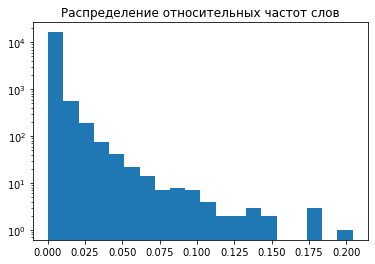

In [62]:
plt.hist(word_doc_freq, bins=20)
plt.title('Распределение относительных частот слов')
plt.yscale('log');

In [63]:
VECTORIZATION_MODE = 'tfidf'
# построение матрицы признаков по методу мешка слов
# функция vectorize_texts принимает на вход
#1. токенизированные список списков
#2. словарь
#3. вектор частоты токенизированны
#4. алгоритм взвешивания токенов по частоте mode - есть 4 алгорима - bin,tf,idf,tfidf
#5. флаг чтобы перемаштабировать флаг после взвешивания

train_vectors = vectorize_texts(train_tokenized, vocabulary, word_doc_freq, mode=VECTORIZATION_MODE)

print('Размерность матрицы признаков обучающей выборки', train_vectors.shape)
print()
print('Количество ненулевых элементов в обучающей выборке', train_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(train_vectors.nnz * 100 / (train_vectors.shape[0] * train_vectors.shape[1])))
print()

Размерность матрицы признаков обучающей выборки (11941, 17342)

Количество ненулевых элементов в обучающей выборке 619898
Процент заполненности матрицы признаков 0.30%



In [64]:
model_t = api.load('glove-twitter-100')

In [65]:
from gensim import utils

def get_vectors_gt100(row):
    '''
      word_doc_freq # частоты слов
      train_tokenized #сами слова
    '''
    vecs = [np.zeros(100)]
    for word in row:
        #print(row)
        try: 
            # если слово есть в нашем очищенном словаре
            # умножаем вектор на вес tfidf
            v = model_t[word] * word_doc_freq[vocabulary[word]] 
        except:
            v = np.zeros(100)
        vecs.append(v)
    return np.sum(np.array(vecs),axis=0)

In [66]:
train_gt100 = np.array([get_vectors_gt100(i) for i in train_tokenized])
val_gt100 = np.array([get_vectors_gt100(i) for i in val_tokenized])

In [67]:
model_t.most_similar(positive=['инвестор', 'рынок'], topn=1)

[('аналитик', 0.7176759243011475)]

In [68]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_gt100, y_train)

pred = clf.predict(val_gt100)
accuracy_score(pred, y_val)

0.6989283322170127

In [69]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_gt100, label=y_val)
model.fit(train_gt100, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [70]:
pred = model.predict(val_w2v)
accuracy_score(pred, y_val)

0.6697923643670463